In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

In [ ]:
df_test=pd.read_csv("/content/test.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train=pd.read_csv("/content/train.csv")

In [ ]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [ ]:
print(df_train.isna().sum().sum())
print(df_test.isna().sum().sum())

0
0


# DATA EXPLORATION


In [ ]:
print ("MNIST train - rows :",df_train.shape[0],"columns:",df_train.shape[1])
print("MNIST test - rows :",df_test.shape[0],"columns:",df_test.shape[1])

MNIST train - rows : 42000 columns: 785
MNIST test - rows : 28000 columns: 784


# EDA

In [ ]:
df_train['label'].value_counts().sort_index()

,count
label,
0,4132
1,4684
2,4177
3,4351
4,4072
5,3795
6,4137
7,4401
8,4063


<ipython-input-10-019e1b113ced>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label',data=df_train,palette='Dark2')


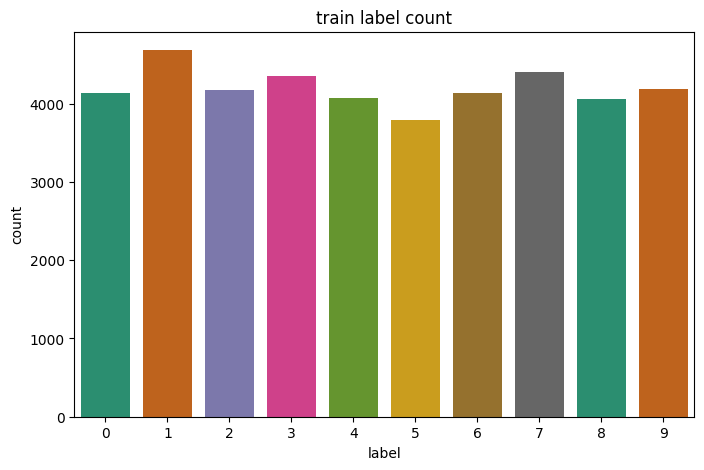

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='label',data=df_train,palette='Dark2')
plt.title('train label count')
plt.show()

<ipython-input-13-8b2933dc985f>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(row[0])


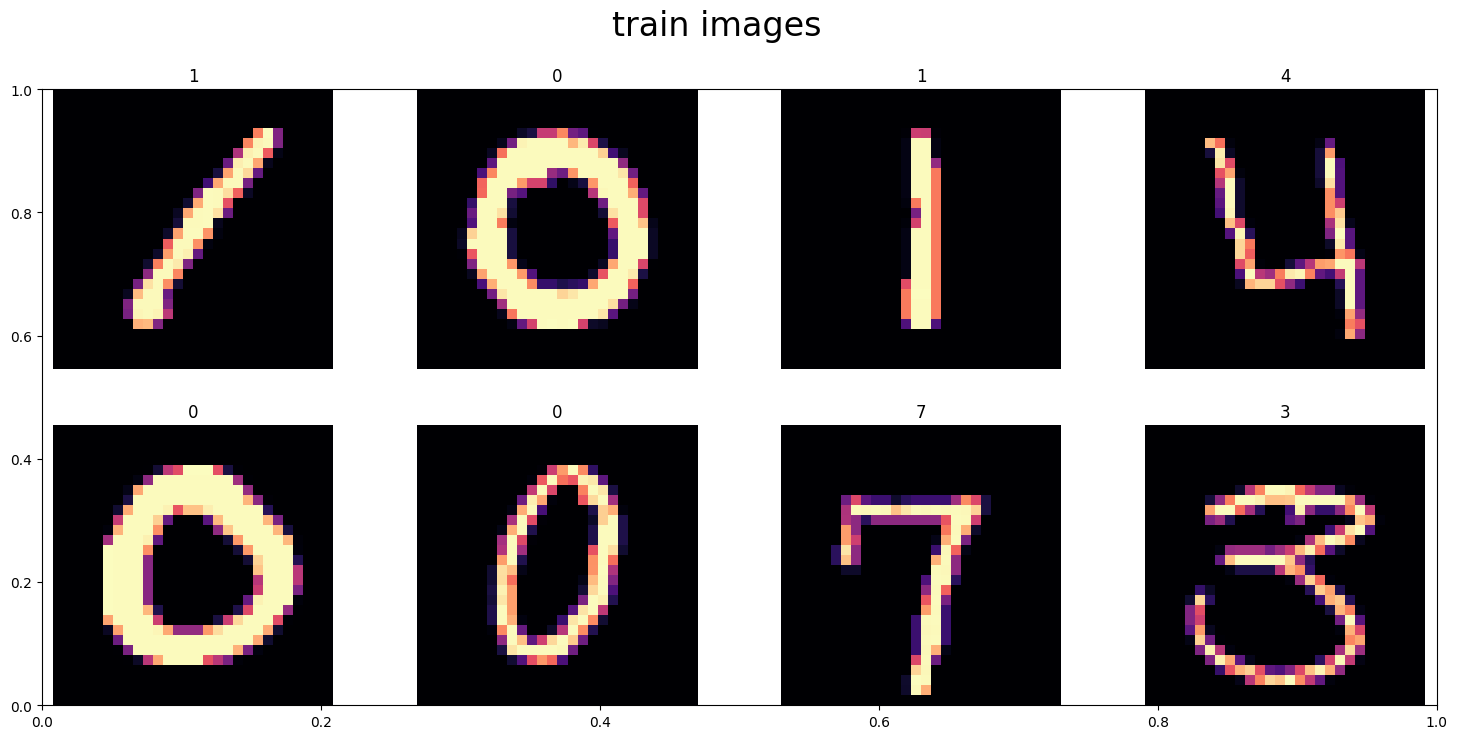

In [ ]:
# first few train images wirh labels
fig,ax=plt.subplots(figsize=(18,8))
for ind ,row in df_train.iloc[:8,:].iterrows():
  plt.subplot(2,4,ind+1)
  plt.title(row[0])
  img=row.to_numpy()[1:].reshape(28,28)
  fig.suptitle('train images',fontsize=24)
  plt.axis("off")
  plt.imshow(img,cmap='magma')

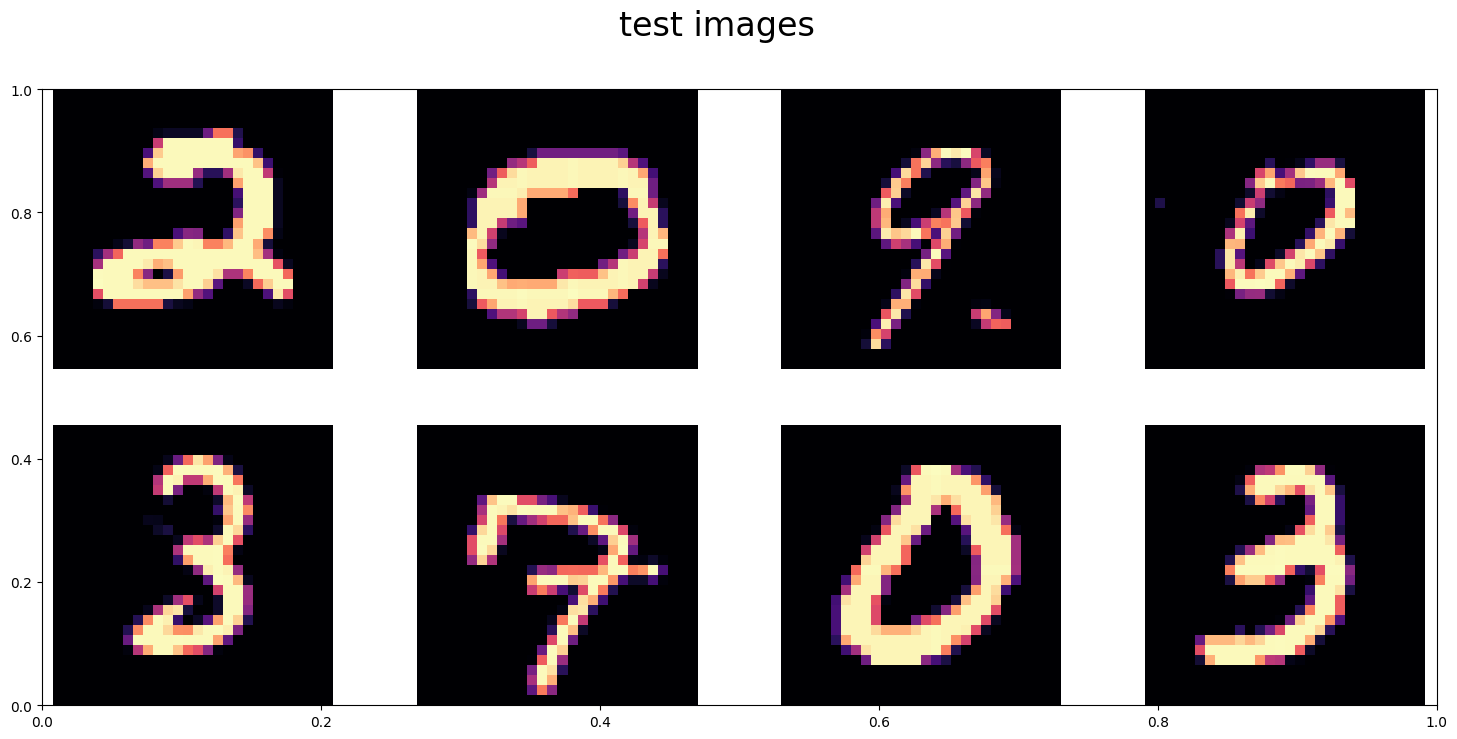

In [ ]:
fig,ax=plt.subplots(figsize=(18,8))
for ind ,row in df_test.iloc[:8,:].iterrows():
  plt.subplot(2,4,ind+1)
  img=row.to_numpy()[:].reshape(28,28)
  fig.suptitle('test images',fontsize=24)
  plt.axis('off')
  plt.imshow(img,cmap='magma')

# preprocessing

In [ ]:
# split into image and labels and convert to numpy array
x=df_train.iloc[:,1:].to_numpy()
y=df_train['label'].to_numpy()

In [ ]:
test=df_test.loc[:,:].to_numpy()
for i in [x,y,test]:
  print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [ ]:
# normalize the data
x=x/255.0
test=test/255.0

In [ ]:
# reshape the dataset
# shape of training and test data
print(x.shape)
print(test.shape)

(42000, 784)
(28000, 784)


In [ ]:
# reshape the dataframe to 3*3 matrix with 1 channel grey scale values
x=x.reshape(-1,28,28,1)
test=test.reshape(-1,28,28,1)

In [ ]:
print(x.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [ ]:
# one hot encode target
# shape and values of target
print(y.shape)
print(y[0])

(42000,)
1


In [ ]:
y_encode=to_categorical(y,num_classes=10)

print(y_encode.shape)
print(y_encode[0])

(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# train test split
random_seed=2
x_train,x_val,y_train_enc,y_val_enc=train_test_split(x,y_encode,test_size=0.3)
for i in [x_train,y_train_enc,x_val,y_val_enc]:
  print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


# plot image

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


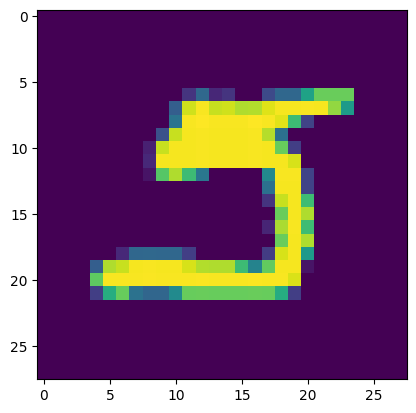

In [ ]:
g=plt.imshow(x_train[0][:,:,0])
print(y_train_enc[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


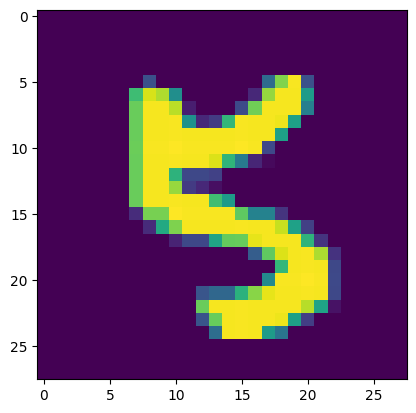

In [ ]:
g=plt.imshow(x_train[9][:,:,0])
print(y_train_enc[9])

# CNN

In [ ]:
input_shape=(28,28,1)
output_shape=10
batch_size=128
epochs=10
verbose=2

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10,activation='softmax'))


# compile the model

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 232,650 (908.79 KB)

 Trainable params: 232,650 (908.79 KB)

 Non-trainable params: 0 (0.00 B)

# model fitting

In [ ]:
history=model.fit(x_train,y_train_enc,
                  epochs=epochs,
                  batch_size=batch_size,
                  verbose=verbose,
                  validation_split=0.3)

Epoch 1/10
161/161 - 22s - 135ms/step - accuracy: 0.8191 - loss: 0.5667 - val_accuracy: 0.9602 - val_loss: 0.1308
Epoch 2/10
161/161 - 18s - 113ms/step - accuracy: 0.9559 - loss: 0.1476 - val_accuracy: 0.9748 - val_loss: 0.0789
Epoch 3/10
161/161 - 18s - 114ms/step - accuracy: 0.9701 - loss: 0.0978 - val_accuracy: 0.9760 - val_loss: 0.0746
Epoch 4/10
161/161 - 21s - 128ms/step - accuracy: 0.9765 - loss: 0.0751 - val_accuracy: 0.9802 - val_loss: 0.0678
Epoch 5/10
161/161 - 20s - 127ms/step - accuracy: 0.9817 - loss: 0.0595 - val_accuracy: 0.9823 - val_loss: 0.0574
Epoch 6/10
161/161 - 20s - 126ms/step - accuracy: 0.9842 - loss: 0.0533 - val_accuracy: 0.9822 - val_loss: 0.0576
Epoch 7/10
161/161 - 15s - 92ms/step - accuracy: 0.9865 - loss: 0.0433 - val_accuracy: 0.9845 - val_loss: 0.0527
Epoch 8/10
161/161 - 28s - 172ms/step - accuracy: 0.9869 - loss: 0.0398 - val_accuracy: 0.9858 - val_loss: 0.0465
Epoch 9/10
161/161 - 43s - 264ms/step - accuracy: 0.9896 - loss: 0.0318 - val_accuracy: 0

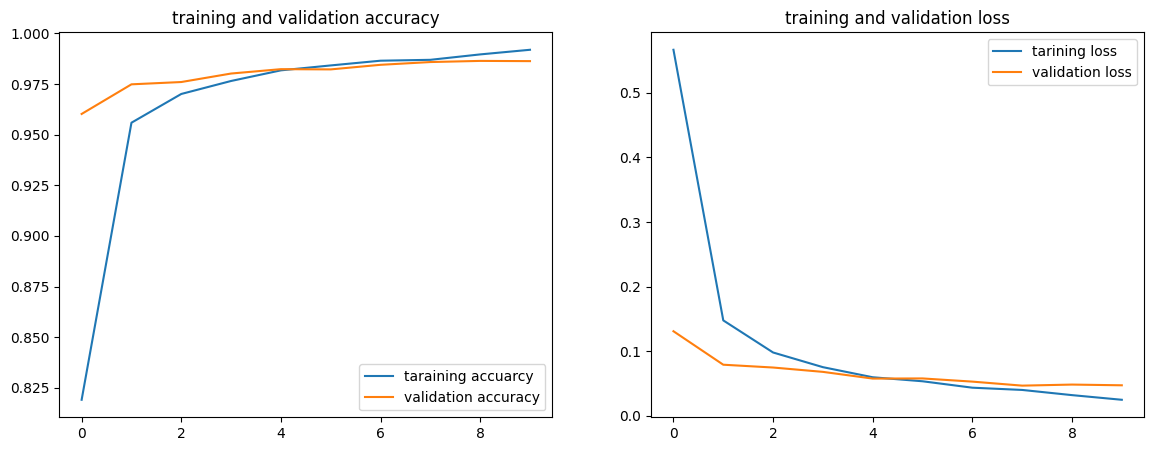

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='taraining accuarcy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='tarining loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')

plt.savefig('./foo.png')
plt.show()

In [ ]:
# model loss and accuracy on validation set
model.evaluate(x_val,y_val_enc,verbose=False)

[0.055096983909606934, 0.9848412871360779]

In [ ]:
# predictes values\
y_pred_enc=model.predict(x_val)

y_actual=[np.argmax(i) for i in y_val_enc]

y_pred=[np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
[1.94493228e-12 2.59251038e-08 6.39470976e-10 1.59577104e-12
 9.99999702e-01 1.01336016e-10 1.58688337e-07 5.13551379e-09
 5.65846037e-08 5.95553047e-08]
4


In [ ]:
print(classification_report(y_actual,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1279
           1       0.99      0.99      0.99      1400
           2       0.98      0.98      0.98      1249
           3       0.99      0.98      0.98      1326
           4       0.98      0.98      0.98      1212
           5       0.99      0.98      0.98      1222
           6       0.98      0.99      0.99      1209
           7       0.99      0.98      0.98      1269
           8       0.98      0.99      0.99      1192
           9       0.97      0.98      0.97      1242

    accuracy                           0.98     12600
   macro avg       0.98      0.98      0.98     12600
weighted avg       0.98      0.98      0.98     12600



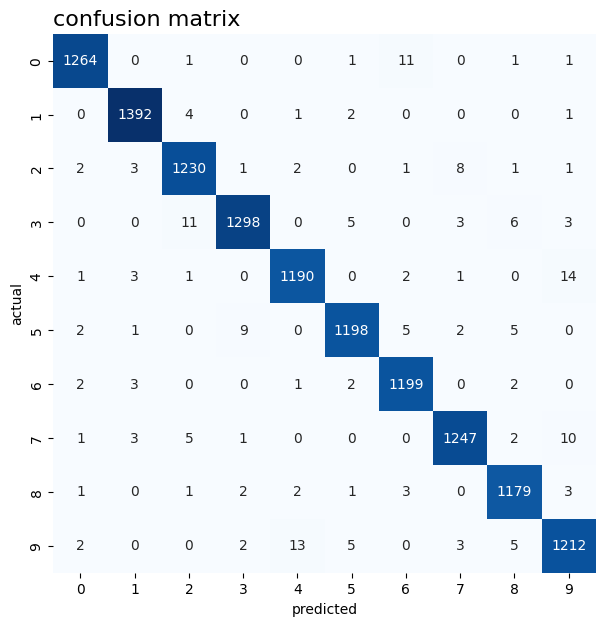

In [ ]:
fig,ax=plt.subplots(figsize=(7,7))
sns.heatmap(confusion_matrix(y_actual,y_pred),annot=True,cbar=False,
            fmt='1d',cmap='Blues',ax=ax)
ax.set_title('confusion matrix',loc='left',fontsize=16)
ax.set_xlabel('predicted')
ax.set_ylabel('actual')
plt.show()

In [ ]:
#predicted values
y_pred_enc=model.predict(test)

y_pred=[np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step
[1.0175483e-09 1.1940787e-09 9.9999994e-01 3.0740239e-08 1.5349626e-09
 5.2477645e-12 2.0805183e-10 2.3282851e-09 2.6569469e-09 6.7328830e-11]
2


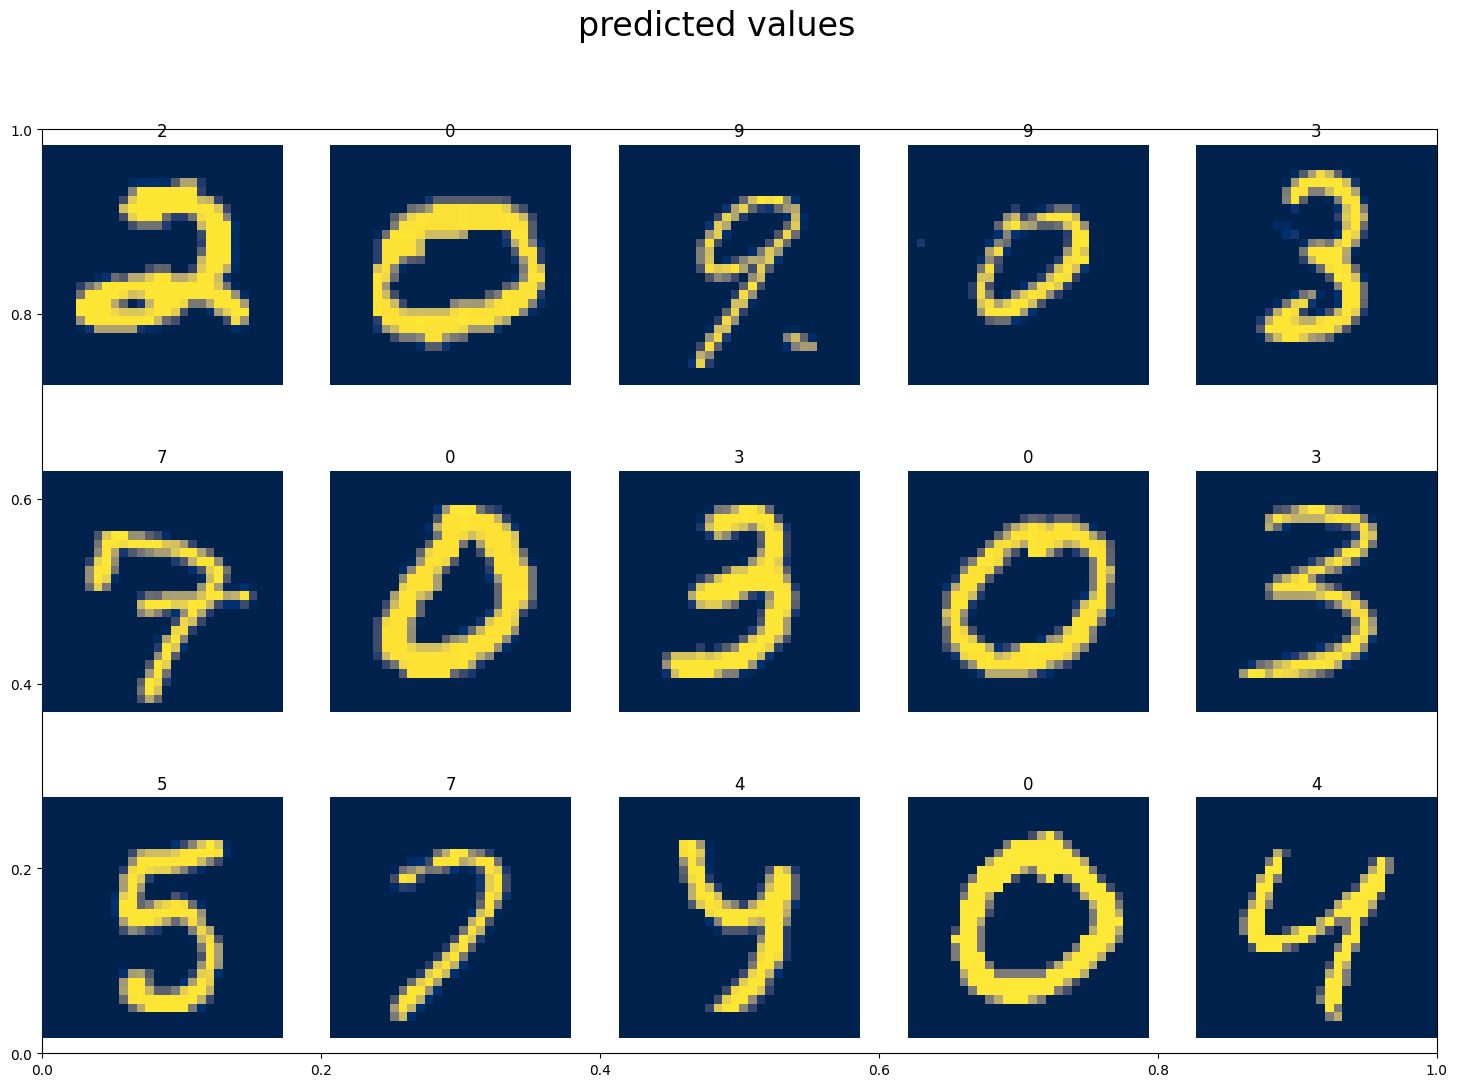

In [ ]:
# predicting targets of each images
fig,ax=plt.subplots(figsize=(18,12))
for ind, row in enumerate(test[:15]):
  plt.subplot(3,5,ind+1)
  plt.title(y_pred[ind])
  img=row.reshape(28,28)
  fig.suptitle('predicted values',fontsize=24)
  plt.axis('off')
  plt.imshow(img,cmap='cividis')